<a href="https://colab.research.google.com/github/angelfpz127/Actividad-1/blob/main/Actividad1_Munich.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regresión Lineal Múltiple: Airbnb München 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
#Leer datos

df=pd.read_csv('listings_Munich.csv')
df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,21641918,https://www.airbnb.com/rooms/21641918,20220921172344,2022-09-21,city scrape,Gemütliches helles Gästezimmer nahe München,Sehr schönes helles Zimmer im Dachgeschoß mit ...,NaN,https://a0.muscache.com/pictures/aafaf797-4be0...,20805795,...,4.97,4.85,4.93,NaN,f,1,0,1,0,1.98
1,14711185,https://www.airbnb.com/rooms/14711185,20220921172344,2022-09-21,city scrape,Mi casa es su casa,In unserer Wohnung mit einem gemütlichen Schla...,Es gibt viel Grün im Ort - viele Spielplätze u...,https://a0.muscache.com/pictures/8941737c-be2e...,56395839,...,4.41,4.06,4.59,NaN,f,1,0,1,0,0.26
2,20162448,https://www.airbnb.com/rooms/20162448,20220921172344,2022-09-21,city scrape,Shabby chic 30 minutes to Oktoberfest .,Shabby Chic 30 minutes from Oktoberfest. Share...,You`ll reach the pretty riverside of Isar with...,https://a0.muscache.com/pictures/25e4368a-7e06...,41482289,...,4.86,4.57,4.29,NaN,f,1,0,1,0,0.11
3,24837769,https://www.airbnb.com/rooms/24837769,20220921172344,2022-09-21,city scrape,Hohenbrunn(MUC)-Zuhause mit Aussicht und City ...,"Wunderschöne, große 2-Zimmer-Wohnung im Grünen...",Die Nachbarschaft ist sehr liebevoll und freun...,https://a0.muscache.com/pictures/fbb115cc-510e...,172211954,...,4.85,4.65,4.60,NaN,f,1,1,0,0,0.39
4,20900945,https://www.airbnb.com/rooms/20900945,20220921172344,2022-09-21,city scrape,Guesthouse at fasanenpark,(20 minutes to the Oktoberfest. The train stat...,NaN,https://a0.muscache.com/pictures/ac4f0d1b-b394...,150163486,...,4.97,4.83,4.72,NaN,f,1,0,1,0,0.49


In [ ]:
#Solo tomamos las columnas de interés

df=df[['number_of_reviews', 'host_acceptance_rate', 'price', 'availability_365', 'review_scores_rating', 'review_scores_cleanliness','review_scores_communication', 'room_type']]
df.head()

,number_of_reviews,host_acceptance_rate,price,availability_365,review_scores_rating,review_scores_cleanliness,review_scores_communication,room_type
0,116,93%,$110.00,124,4.92,4.99,4.97,Private room
1,19,50%,$45.00,3,4.71,4.88,4.41,Private room
2,7,29%,$120.00,352,4.43,4.71,4.86,Private room
3,20,100%,$100.00,263,4.80,4.70,4.85,Entire home/apt
4,30,80%,$137.00,52,4.83,4.31,4.97,Private room


In [ ]:
print(df.shape) #Número de filas y columnas
Duplicadas=df.duplicated()  #Crea una serie 
print("\nNúmero de filas duplicadas:", Duplicadas[Duplicadas==True].count()) 

(6627, 8)

Número de filas duplicadas: 162


In [ ]:
#Limpieza de filas repetidas
df.drop_duplicates(keep='first', inplace=True)
df.shape

(6465, 8)

In [ ]:
#Quitamos % y $ en las columnas correspondiente
df["host_acceptance_rate"] = df["host_acceptance_rate"].str.replace("%","")
df["price"] = df["price"].str.replace("$","")
df["price"] = df["price"].str.replace(",","")

df.dtypes

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


number_of_reviews                int64
host_acceptance_rate            object
price                           object
availability_365                 int64
review_scores_rating           float64
review_scores_cleanliness      float64
review_scores_communication    float64
room_type                       object
dtype: object

In [ ]:
#Identificar nulos
df.isnull().sum()

number_of_reviews                 0
host_acceptance_rate           1014
price                             0
availability_365                  0
review_scores_rating           1919
review_scores_cleanliness      1942
review_scores_communication    1943
room_type                         0
dtype: int64

In [ ]:
df=df.fillna({'host_acceptance_rate':0,'review_scores_rating':0, 'review_scores_cleanliness':0, 'review_scores_communication':0})
df.isnull().sum()

number_of_reviews              0
host_acceptance_rate           0
price                          0
availability_365               0
review_scores_rating           0
review_scores_cleanliness      0
review_scores_communication    0
room_type                      0
dtype: int64

In [ ]:
#Convertimos variables a tipo int y float
df["host_acceptance_rate"] = df["host_acceptance_rate"].astype('int64')
df["price"] = df["price"].astype('float64')

#Reemplazamos los ceros por la media (los ceros eran nulos)
df['host_acceptance_rate'].replace(0,df['host_acceptance_rate'].mean())
df['review_scores_rating'].replace(0,df['review_scores_rating'].mean())
df['review_scores_cleanliness'].replace(0,df['review_scores_cleanliness'].mean())
df['review_scores_communication'].replace(0,df['review_scores_communication'].mean())
df.dtypes

number_of_reviews                int64
host_acceptance_rate             int64
price                          float64
availability_365                 int64
review_scores_rating           float64
review_scores_cleanliness      float64
review_scores_communication    float64
room_type                       object
dtype: object

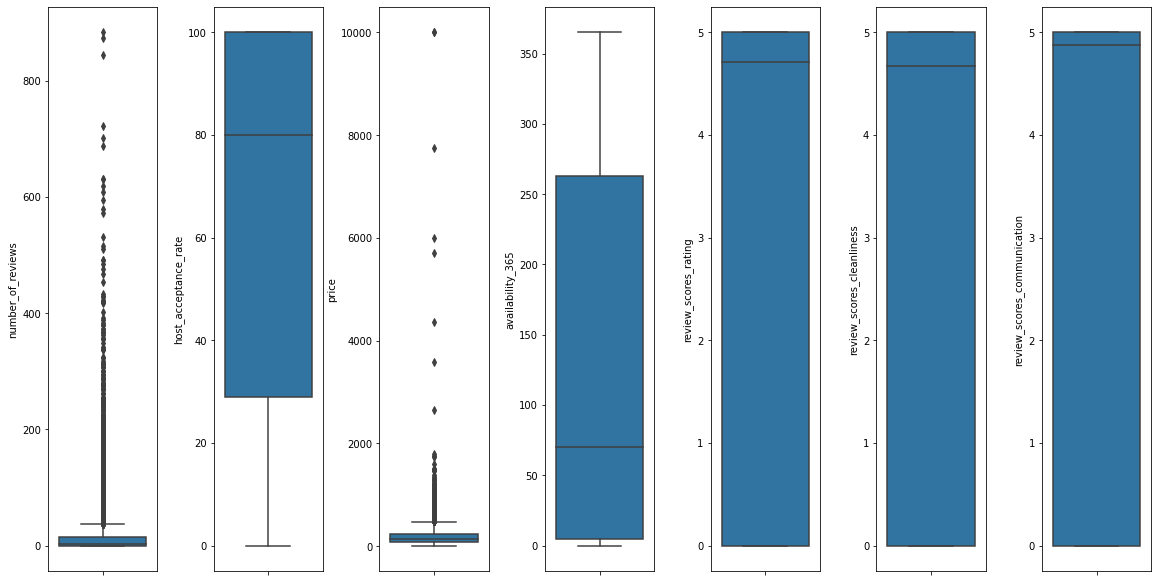

In [ ]:
fig, axs = plt.subplots(ncols=7, figsize=(16,8))
index=0
axs=axs.flatten()
copiadf=df.copy()
copiadf=copiadf.drop('room_type', axis=1)
for k, v in copiadf.items(): # k variable, v valores
  sns.boxplot(y=k, data=df, ax=axs[index])
  index += 1
plt.tight_layout(pad=0.4)

In [ ]:
#Midificamos todos los datos atípicos (fuera del rango intercuartil) por la media
for columna in df.drop('room_type', axis=1).columns:
  Q3=df[columna].quantile(q=0.75)
  Q1=df[columna].quantile(q=0.25)
  RQ=Q3-Q1
  promedio=df[columna].mean()
  df[columna]=df[columna].mask(df[columna]<Q1-1.5*RQ, promedio)
  df[columna]=df[columna].mask(df[columna]>Q3+1.5*RQ, promedio)

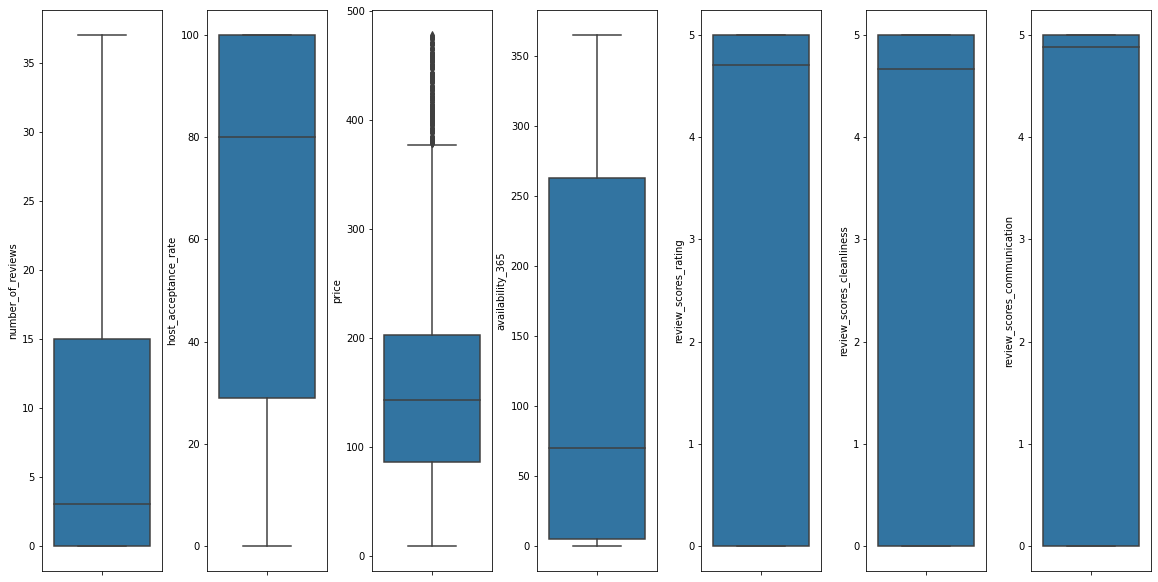

In [ ]:
fig, axs = plt.subplots(ncols=7, figsize=(16,8))
index=0
axs=axs.flatten()
copiadf=df.copy()
copiadf=copiadf.drop('room_type', axis=1)
for k, v in copiadf.items(): # k variable, v valores
  sns.boxplot(y=k, data=df, ax=axs[index])
  index += 1
plt.tight_layout(pad=0.4)

In [ ]:
#División en 3 DataFrames

df_Home=df[df['room_type']=='Entire home/apt']
df_Room=df[df['room_type']=='Private room']
df_Shared=df[df['room_type']=='Shared room']

print(df_Home.shape)
print(df_Room.shape)
print(df_Shared.shape)

(4154, 8)
(2207, 8)
(71, 8)


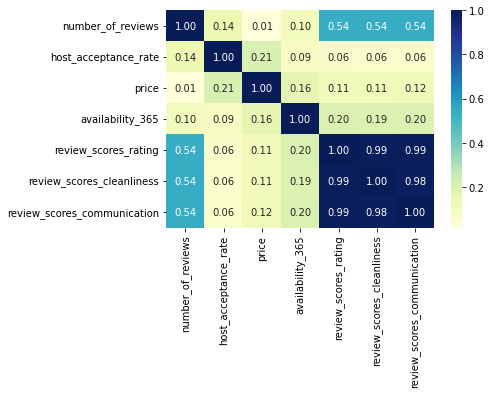

In [ ]:
#Mapa de correlaciones
Corr_Factors=df_Home.corr()
Corr_Factors_abs= abs(Corr_Factors)
Heat_Map=sns.heatmap(Corr_Factors_abs, cmap='YlGnBu', annot=True, fmt='.2f')
Heat_Map

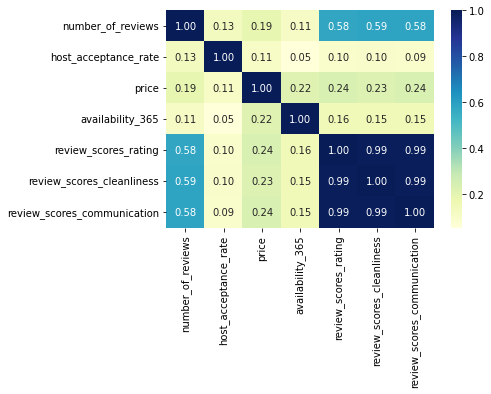

In [ ]:
#Mapa de correlaciones
Corr_Factors=df_Room.corr()
Corr_Factors_abs= abs(Corr_Factors)
Heat_Map=sns.heatmap(Corr_Factors_abs, cmap='YlGnBu', annot=True, fmt='.2f')
Heat_Map

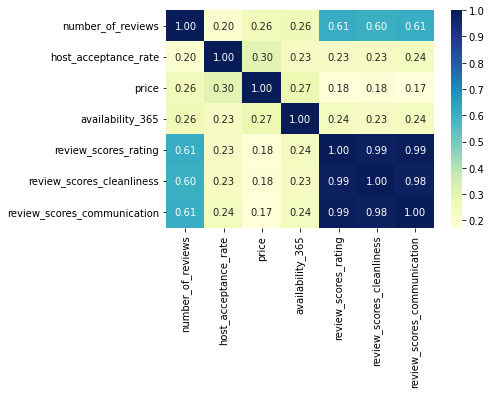

In [ ]:
#Mapa de correlaciones
Corr_Factors=df_Shared.corr()
Corr_Factors_abs= abs(Corr_Factors)
Heat_Map=sns.heatmap(Corr_Factors_abs, cmap='YlGnBu', annot=True, fmt='.2f')
Heat_Map

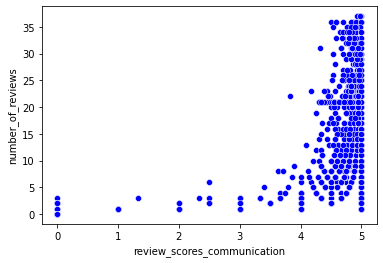

In [ ]:
from turtle import color

sns.scatterplot(x='review_scores_communication', y='number_of_reviews', color='blue', data=df_Home)

In [ ]:
from sklearn.linear_model import LinearRegression
import math

class Regresion():
  def __init__(self, x, y, df):  #y es el nombre de la columna variable dependiente. x es el nombre de las columnas variables independientes
    self.df=df
    self.Var_dep=df[y]
    self.Vars_indep=df[x]
    self.modelo=LinearRegression()
    self.modelo.fit(X=self.Vars_indep, y=self.Var_dep)

class Tabla_coef():
  def __init__(self, lista_modelos): #Recibe una lista con modelos de regresión
    tipo_cuarto=['Entire Home', 'Private room', 'Shared room']
    contador=0
    print('Tipo cuarto\tCoef deter \t\tCorrelacion')
    for j in lista_modelos:
      coef_deter=j.modelo.score(X=j.Vars_indep, y=j.Var_dep)
      print(tipo_cuarto[contador]+'\t'+str(coef_deter)+"\t"+str(math.sqrt(coef_deter)) )
      contador+=1

In [ ]:
y_name='number_of_reviews'
x_names=['review_scores_rating','review_scores_cleanliness','review_scores_communication']

reg_Home=Regresion(x_names,y_name,df_Home)
reg_Room=Regresion(x_names,y_name,df_Room)
reg_Shared=Regresion(x_names,y_name,df_Shared)

tabla=Tabla_coef([reg_Home, reg_Room, reg_Shared])

Tipo cuarto	Coef deter 		Correlacion
Entire Home	0.2947906999885831	0.5429463140942971
Private room	0.3438872035596605	0.5864189658935499
Shared room	0.3754034241139076	0.6127017415626527
